In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [5]:
data = pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
print(f"This dataframe has {data.shape[0]} rows")
print(f"This dataframe has {data.shape[1]} columns")

This dataframe has 301 rows
This dataframe has 9 columns


In [10]:
# Trying to find the categorical features
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())
print(data['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [11]:
# Check for missing values
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
data['Age'] = 2020 - data['Year'] 
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

In [18]:
final_df = data[['Year', 'Age', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_df.sample(5)

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
183,2013,7,0.27,0.47,21000,Petrol,Individual,Manual,0
151,2016,4,0.50,0.55,31000,Petrol,Individual,Manual,0
142,2015,5,0.60,0.84,29000,Petrol,Individual,Manual,0
166,2016,4,0.45,0.55,1000,Petrol,Individual,Manual,0
252,2015,5,5.40,6.82,31427,Petrol,Dealer,Automatic,0


In [19]:
final_df.drop(labels=['Year'], axis=1, inplace=True)
final_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.sample(3)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
79,8,14.50,30.61,89000,0,1,0,0,0
123,7,1.00,1.47,46500,0,0,1,1,1
136,6,0.65,1.20,23500,0,0,1,1,1


<AxesSubplot:>

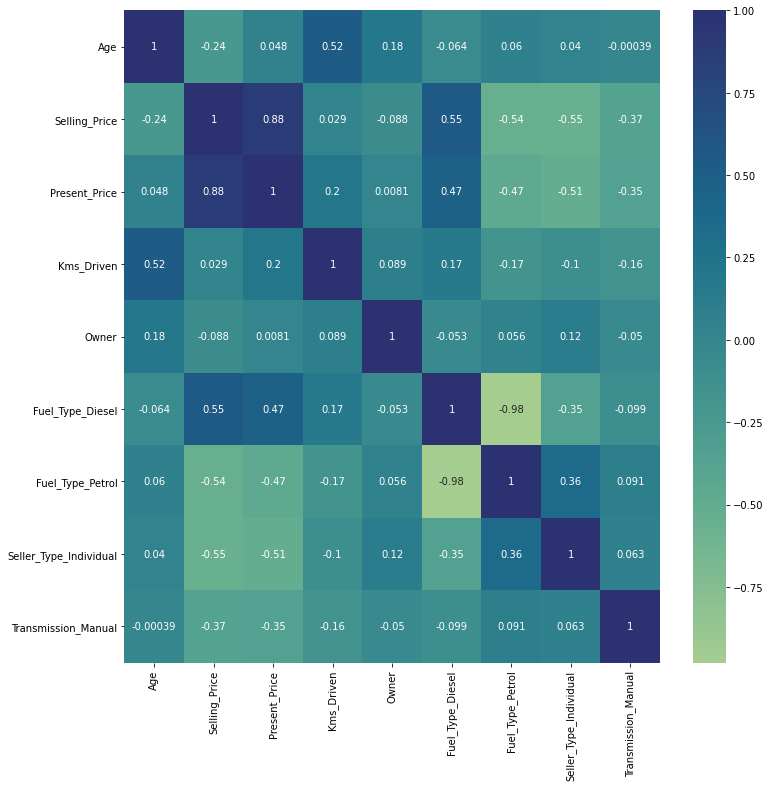

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
corr_matrix = final_df.corr()
cmap = sns.color_palette("crest", as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True)

In [33]:
final_df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


In [36]:
#Getting the independent and dependent feature
final_df.columns

X = final_df[['Age', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]

y = final_df['Selling_Price']

In [37]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [38]:
## Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [42]:
feat_imp = model.feature_importances_
colnames = X.columns

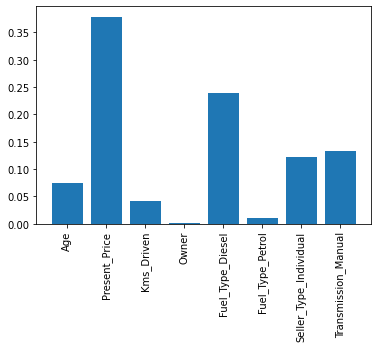

In [46]:
plt.bar(colnames, feat_imp)
plt.xticks(rotation=90)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
#Hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#Number of features to consider at every split
max_features =['auto', 'sqrt']

# Levels in tree
max_depth=[int(x) for x in np.linspace(5, 30, 6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [51]:
from sklearn.model_selection import RandomizedSearchCV


In [53]:
# Create the random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
predictions = rf_random.predict(X_test)
predictions

array([ 3.3653  ,  5.57005 ,  1.2455  ,  6.97116 ,  0.57199 ,  0.48991 ,
        4.48355 ,  7.6767  , 11.23686 ,  0.5866  ,  3.1952  , 11.17467 ,
        6.6906  ,  6.12293 ,  7.36273 ,  3.02685 ,  3.70941 ,  5.257675,
        0.41949 ,  3.82688 ,  8.34409 ,  4.8849  ,  0.50915 , 20.91675 ,
        0.55094 ,  3.1148  ,  8.03884 ,  0.64402 ,  8.70984 ,  1.02298 ,
        5.4336  ,  4.09155 ,  0.38755 ,  5.9562  ,  3.7342  ,  3.91937 ,
        0.72655 ,  1.1108  ,  4.31315 ,  3.73904 ,  0.82916 ,  2.52885 ,
        0.47963 ,  3.44666 ,  3.73757 ,  0.36788 ,  5.6362  ,  0.44956 ,
        0.42422 ,  5.0076  ,  2.90336 ,  0.48959 ,  0.3654  ,  0.37412 ,
        0.488   ,  9.26899 ,  6.1815  ,  0.31011 ,  2.73456 ,  4.854   ,
        7.39785 ])

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

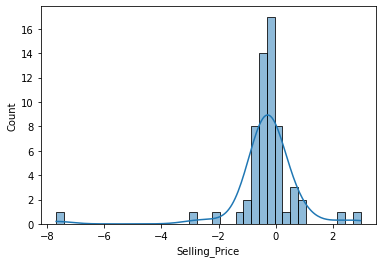

In [60]:
sns.histplot(y_test - predictions, kde=True)

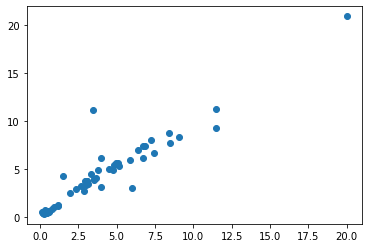

In [61]:
plt.scatter(y_test, predictions)